In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in excel raw data
fname = r"C:\Users\mered\Desktop\Blood vessel spreadsheets\120pointsNormalized_Saline_may2020_log.xls"
bv_df = pd.read_excel(fname)

#create column names and time labels
#Need to make sure that names+time labels are the same width as dataframe
labels = ['File loc', 'File name', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline']
x = len(bv_df.columns)
time = list(range(-3,x-9))
col_labels = labels + time
bv_df.columns = col_labels

#create smaller dataframe with data to graph
bv_reduced = bv_df.drop(columns=['File loc', 'Stim frame', 'Frame rate', 'Threshold method', 'Ave. baseline'])
#bv_reduced['File name']

In [8]:
#iterate through the file names and extract the pulse
pulse = []
line = []
for f in bv_reduced['File name']:
    p = f[0:10]
    pulse.append(p)
    l = f[-5]
    line.append(l)
bv_reduced['Pulse'] = pulse
bv_reduced['Line'] = line
#set pulse and file name as the hierarchical index
bv_reduced.set_index('Pulse', inplace=True)
#bv_time = bv_reduced.drop(columns = ['File name', 'Line']).transpose()
bv_time = bv_reduced.drop(columns = 'File name')
pd.options.display.max_rows = 500
#bv_time.head()
#bv_time.index.unique()

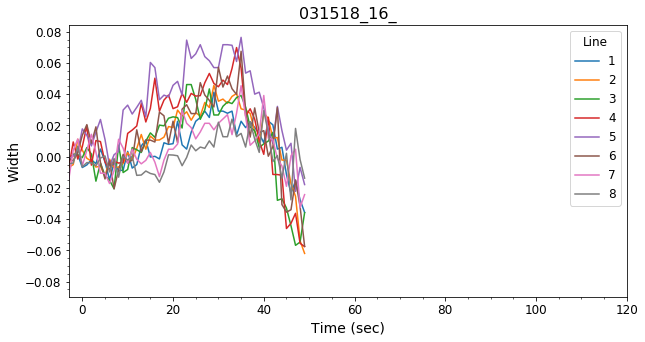

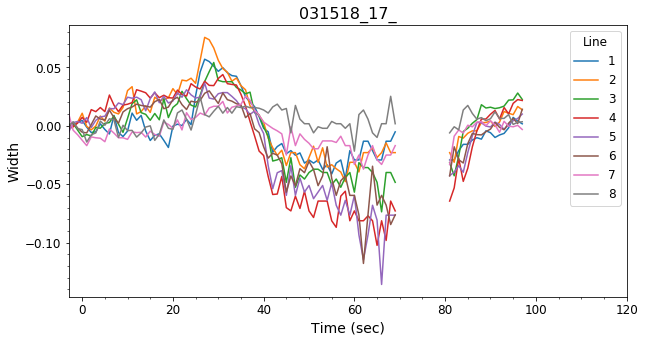

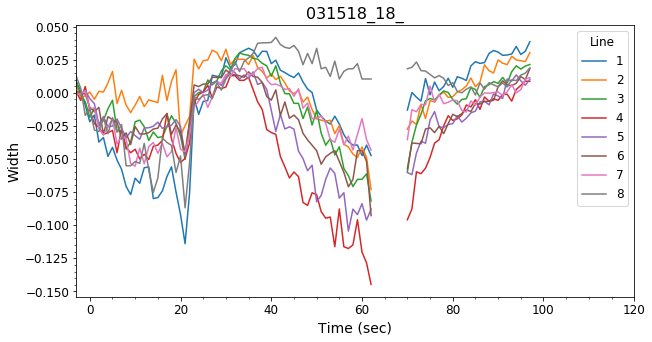

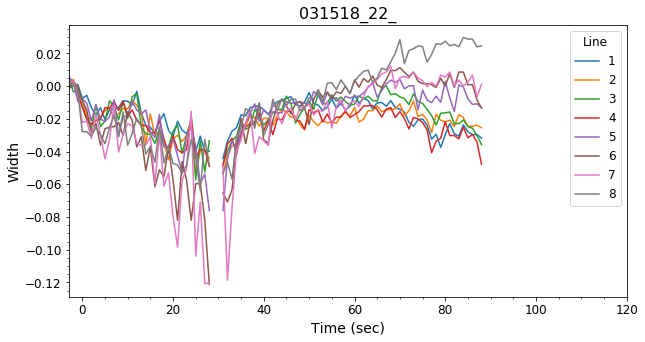

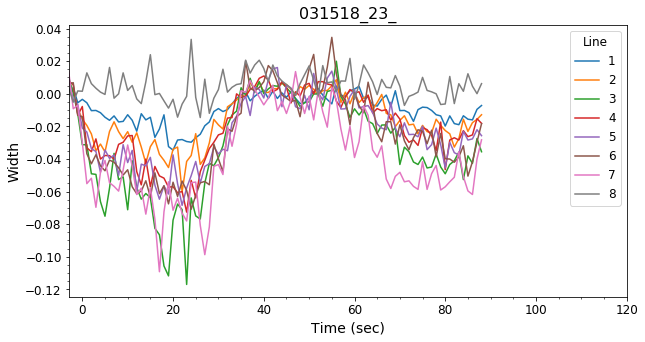

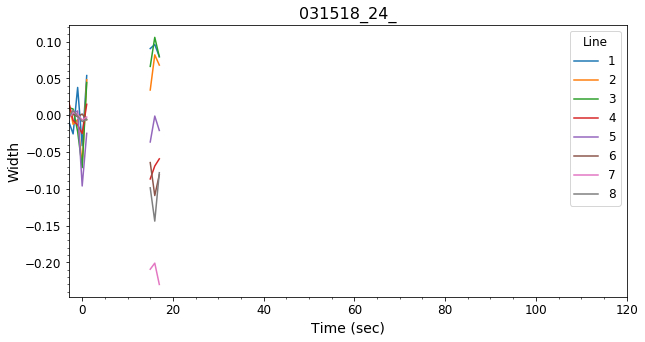

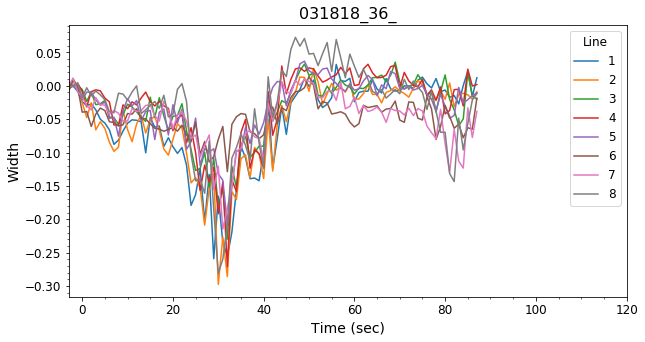

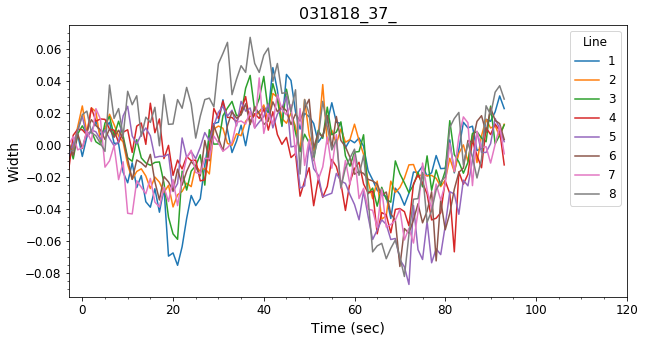

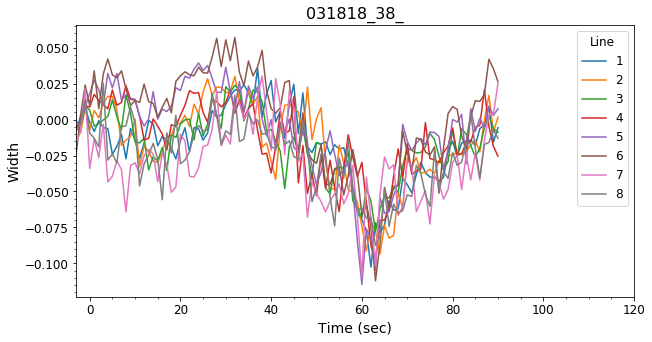

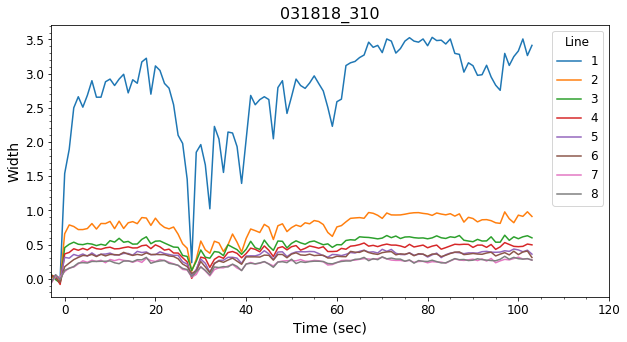

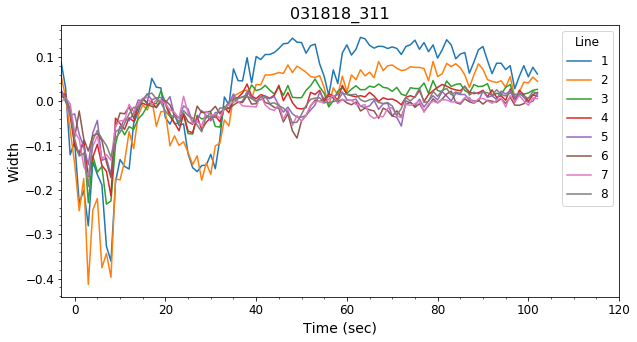

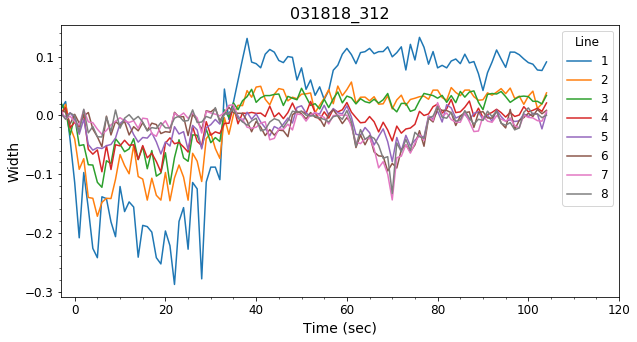

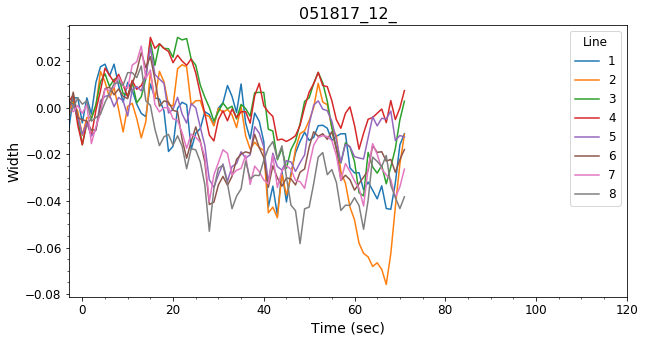

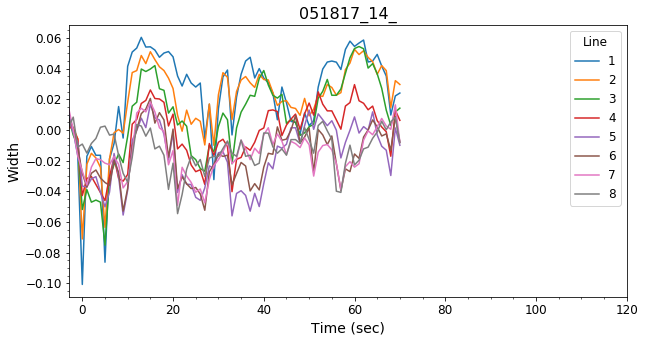

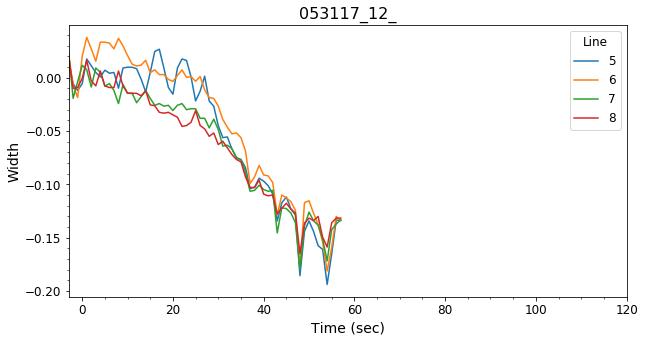

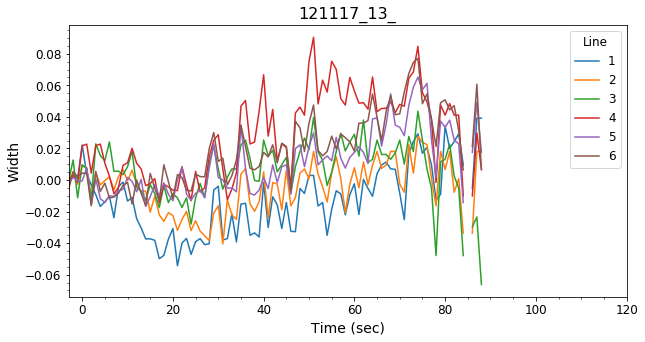

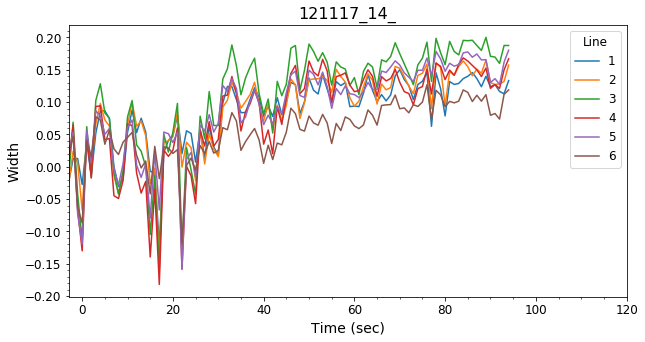

In [49]:
pulses = bv_time.index.unique()
for p in pulses:
    bv_subset = bv_time.loc[p]
    bv_subset.set_index('Line', inplace=True)
    bv_subset_trans = bv_subset.transpose()
    #print(bv_subset_trans)
    # plot
    bv_subset_trans.plot(figsize=(10,5), xlim=(-3,120), fontsize=12)
    plt.legend(fontsize='large', title='Line', title_fontsize=12)
    plt.title(label=p, fontsize=16)
    plt.minorticks_on()
    plt.xlabel('Time (sec)', fontsize=14)
    plt.ylabel('Width', fontsize=14)
    figname = p + '.png'
    #plt.savefig(figname)
    #print(figname)
    plt.show() 